In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from wordcloud import WordCloud

# Upload the file

In [20]:
uploaded_files = files.upload()
file_name = next(iter(uploaded_files))

Saving cleaned_IMDB_Dataset.csv to cleaned_IMDB_Dataset (2).csv


# Read the dataset

In [21]:
data = pd.read_csv(file_name)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Vectorization

In [22]:
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
features = tfidf.fit_transform(data['review']).toarray()
labels = data['sentiment']

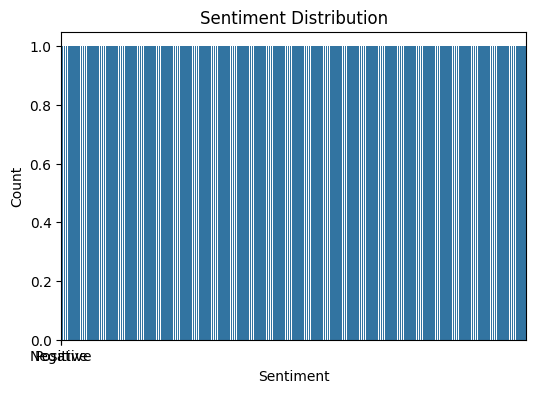

In [23]:
# EDA: Sentiment distribution visualization
plt.figure(figsize=(6,4))
sns.countplot(labels)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

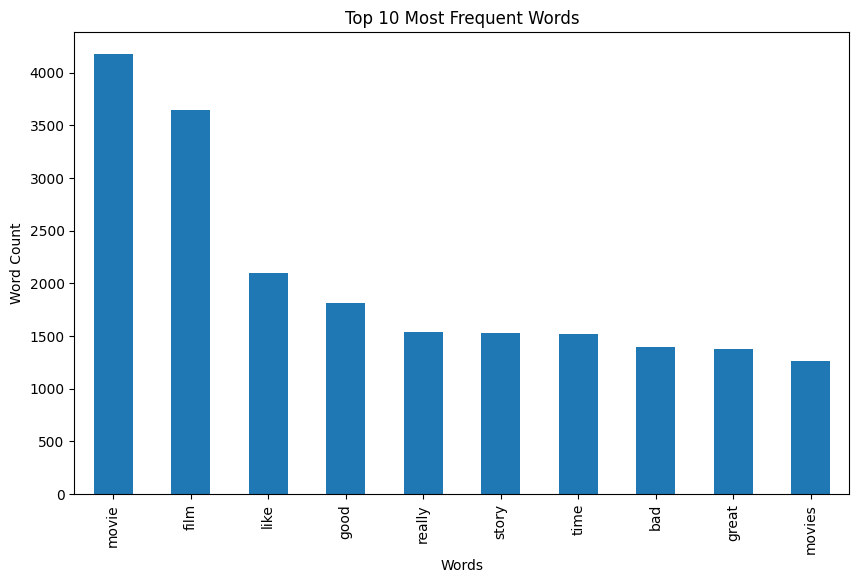

In [24]:
word_counts = pd.DataFrame(features, columns=tfidf.get_feature_names_out()).sum().sort_values(ascending=False)
top_words = word_counts.head(10)

plt.figure(figsize=(10,6))
top_words.plot(kind='bar')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Word Count')
plt.show()

# Split the dataset

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the model

In [26]:
svm = LinearSVC(random_state=42)

# Set up the hyperparameter search

In [27]:
param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Example range, can include more
    'max_iter': [1000, 2000, 3000]  # Example range, can include more
}

# Perform Random Search

In [28]:
random_search = RandomizedSearchCV(
    svm, param_distributions, n_iter=10, cv=5, random_state=42, n_jobs=-1
)

# Fit the random search model to the training data

In [29]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'max_iter': [1000, 2000, 3000]},
                   random_state=42)

# Best estimator

In [30]:
best_svm = random_search.best_estimator_

# Print Accuracy and Classification Report

In [31]:
print("Best hyperparameters:", random_search.best_params_)
# Predictions on the training set
y_train_pred = best_svm.predict(X_train)

# Predictions on the test set
y_test_pred = best_svm.predict(X_test)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Set Accuracy:", train_accuracy)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Set Accuracy:", test_accuracy)

# Print Classification Report for the test set
print(classification_report(y_test, y_test_pred))

Best hyperparameters: {'max_iter': 3000, 'C': 0.1}
Training Set Accuracy: 0.867
Test Set Accuracy: 0.8612
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



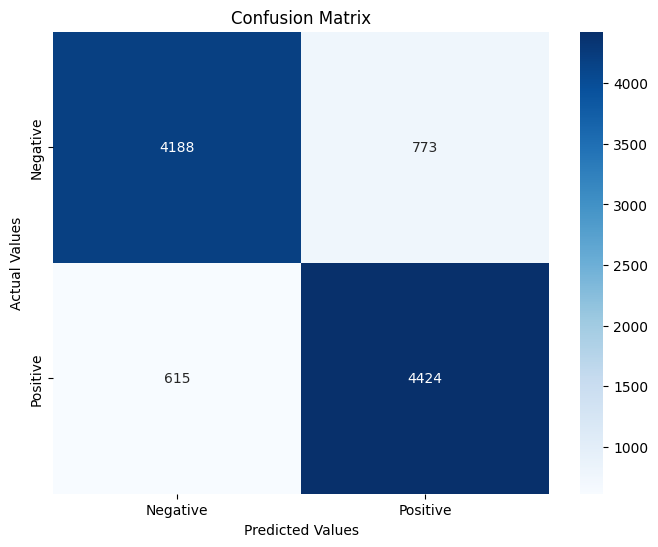

In [32]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()